# Analyzed NYPD Arrest Data
# NYPD Arrest Data from 2006 to 2019
# https://data.cityofnewyork.us/Public-Safety/NYPD-Arrest-Data-Year-to-Date-/uip8-fykc

The Arrest data contains arrest information from all law enforcement agencies in NYC. The data includes arrest and charge information for those individuals booked into New York City Department of Correction facilities only. This dataset reflects arrest incidents in the last 24 hours as selected by the agency.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import requests
import io



In [2]:

import zipfile
import requests
import io
url = "https://github.com/Inderjito/Midterm-Project/blob/main/NYPD_Arrest_Data__Year_to_Date_.csv.zip?raw=true"

s = requests.get(url).content
zf = zipfile.ZipFile(io.BytesIO(s))
df = pd.read_csv(zf.open('NYPD_Arrest_Data__Year_to_Date_.csv'), encoding='latin-1')
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,261209118,01/01/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,K,77,0,45-64,F,BLACK,999335,186085,40.677426,-73.945615,POINT (-73.945615 40.677426)
1,262984267,02/03/2023,515,"CONTROLLED SUBSTANCE,SALE 3",117.0,DANGEROUS DRUGS,PL 2203901,F,K,73,0,25-44,M,BLACK,1009318,178259,40.655923,-73.909650,POINT (-73.90965 40.655923)
2,263664549,02/15/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,K,62,0,25-44,M,WHITE,982272,158771,40.602468,-74.007120,POINT (-74.00712 40.602468)
3,261345231,01/04/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,M,32,0,25-44,M,BLACK,999899,238684,40.821797,-73.943457,POINT (-73.943457 40.821797)
4,263536618,02/13/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 12005WX,F,K,71,0,25-44,M,BLACK,1001437,183080,40.669175,-73.938042,POINT (-73.938042 40.669175)


In [3]:
#Print the shape of the data
print(df.shape)

(170095, 19)


In [4]:
# get info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170095 entries, 0 to 170094
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ARREST_KEY                170095 non-null  int64  
 1   ARREST_DATE               170095 non-null  object 
 2   PD_CD                     170095 non-null  int64  
 3   PD_DESC                   170095 non-null  object 
 4   KY_CD                     170082 non-null  float64
 5   OFNS_DESC                 170095 non-null  object 
 6   LAW_CODE                  170095 non-null  object 
 7   LAW_CAT_CD                168838 non-null  object 
 8   ARREST_BORO               170095 non-null  object 
 9   ARREST_PRECINCT           170095 non-null  int64  
 10  JURISDICTION_CODE         170095 non-null  int64  
 11  AGE_GROUP                 170095 non-null  object 
 12  PERP_SEX                  170095 non-null  object 
 13  PERP_RACE                 170095 non-null  o

In [5]:
# check for missing values
df.isnull().sum()


ARREST_KEY                     0
ARREST_DATE                    0
PD_CD                          0
PD_DESC                        0
KY_CD                         13
OFNS_DESC                      0
LAW_CODE                       0
LAW_CAT_CD                  1257
ARREST_BORO                    0
ARREST_PRECINCT                0
JURISDICTION_CODE              0
AGE_GROUP                      0
PERP_SEX                       0
PERP_RACE                      0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                       0
Longitude                      0
New Georeferenced Column       0
dtype: int64

In [6]:
# describe the data
df.describe()



,ARREST_KEY,PD_CD,KY_CD,ARREST_PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,1.700950e+05,170095.000000,170082.000000,170095.000000,170095.000000,1.700950e+05,170095.000000,170095.000000,170095.000000
mean,2.683705e+08,425.242200,249.766342,63.423569,0.945918,1.005863e+06,208326.176925,40.738196,-73.921525
std,4.027782e+06,275.312255,148.500439,34.596068,7.683909,2.152952e+04,29737.941320,0.128134,0.195134
min,2.611809e+08,2.000000,101.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,-74.253187
25%,2.649555e+08,114.000000,113.000000,40.000000,0.000000,9.913600e+05,186065.000000,40.677251,-73.974365
50%,2.685036e+08,397.000000,236.000000,62.000000,0.000000,1.005511e+06,206851.000000,40.734434,-73.923234
75%,2.718261e+08,705.000000,344.000000,101.000000,0.000000,1.017933e+06,236175.000000,40.814867,-73.878333
max,2.752350e+08,997.000000,995.000000,123.000000,97.000000,1.067185e+06,271819.000000,40.912714,0.000000


In [7]:
#check for duplicates
df.duplicated().sum()


0

In [8]:
#get the unique values of each column
df.nunique()


ARREST_KEY                  170095
ARREST_DATE                    273
PD_CD                          255
PD_DESC                        244
KY_CD                           67
OFNS_DESC                       64
LAW_CODE                      1029
LAW_CAT_CD                       5
ARREST_BORO                      5
ARREST_PRECINCT                 77
JURISDICTION_CODE               24
AGE_GROUP                        5
PERP_SEX                         3
PERP_RACE                        7
X_COORD_CD                   26869
Y_COORD_CD                   28243
Latitude                     36677
Longitude                    36701
New Georeferenced Column     37431
dtype: int64

In [9]:
# check the data types
df.dtypes



ARREST_KEY                    int64
ARREST_DATE                  object
PD_CD                         int64
PD_DESC                      object
KY_CD                       float64
OFNS_DESC                    object
LAW_CODE                     object
LAW_CAT_CD                   object
ARREST_BORO                  object
ARREST_PRECINCT               int64
JURISDICTION_CODE             int64
AGE_GROUP                    object
PERP_SEX                     object
PERP_RACE                    object
X_COORD_CD                    int64
Y_COORD_CD                    int64
Latitude                    float64
Longitude                   float64
New Georeferenced Column     object
dtype: object

In [10]:
df.count()

ARREST_KEY                  170095
ARREST_DATE                 170095
PD_CD                       170095
PD_DESC                     170095
KY_CD                       170082
OFNS_DESC                   170095
LAW_CODE                    170095
LAW_CAT_CD                  168838
ARREST_BORO                 170095
ARREST_PRECINCT             170095
JURISDICTION_CODE           170095
AGE_GROUP                   170095
PERP_SEX                    170095
PERP_RACE                   170095
X_COORD_CD                  170095
Y_COORD_CD                  170095
Latitude                    170095
Longitude                   170095
New Georeferenced Column    170095
dtype: int64

In [11]:
# Replace missing vin column law_cat_cd with 'NA' and print df
df['LAW_CAT_CD'].fillna('NA', inplace=True)
df['LAW_CAT_CD'].head()



0    F
1    F
2    F
3    F
4    F
Name: LAW_CAT_CD, dtype: object

In [12]:
# Coverting the ARREST_DATE column to datetime
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'])
df['ARREST_DATE'].head()


0   2023-01-01
1   2023-02-03
2   2023-02-15
3   2023-01-04
4   2023-02-13
Name: ARREST_DATE, dtype: datetime64[ns]

Text(0.5, 0, 'Borough')

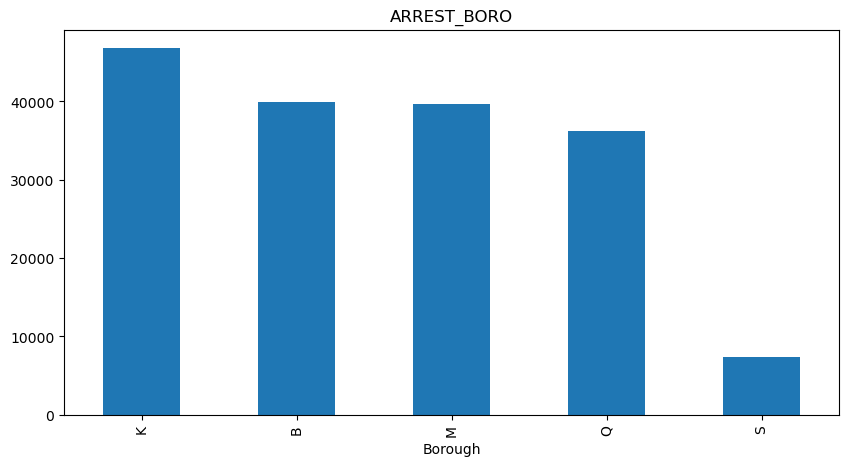

In [30]:
# VISUALIZED ARREST_BORO value counts   in descending order

df['ARREST_BORO'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title('ARREST_BORO')
plt.xlabel('Borough')

Text(0, 0.5, 'PD Description')

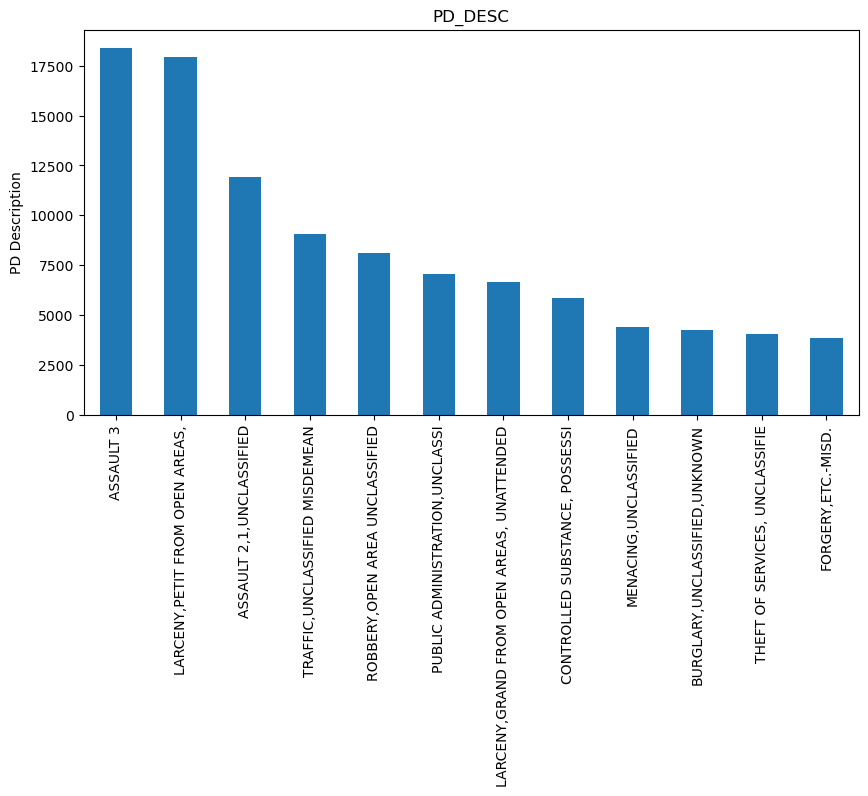

In [26]:
#visualize PD_DESC top 12 value counts in descending order
df  ['PD_DESC'].value_counts().head(12).plot(kind='bar', figsize=(10,5))
plt.title('PD_DESC')
plt.ylabel('PD Description')


Text(0, 0.5, 'Count')

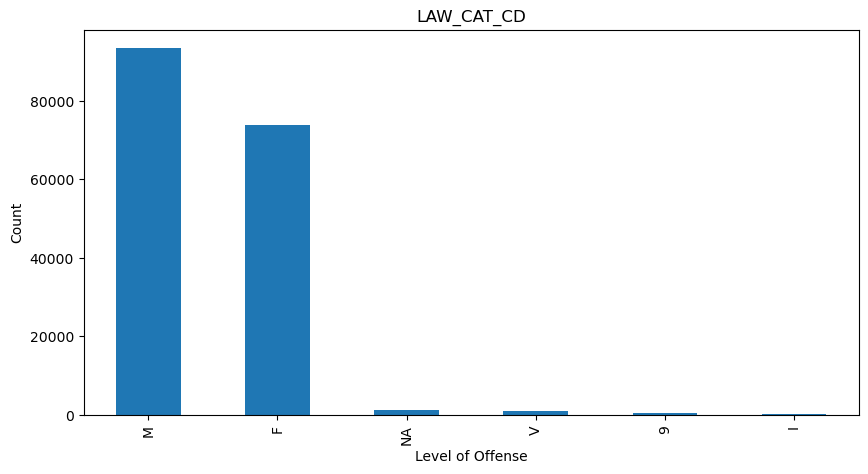

In [29]:
#visualize LAW_CAT_CD value counts in descending order excluding NA
df['LAW_CAT_CD'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title('LAW_CAT_CD')
plt.xlabel('Level of Offense')
plt.ylabel('Count')
    

Text(0, 0.5, 'Count')

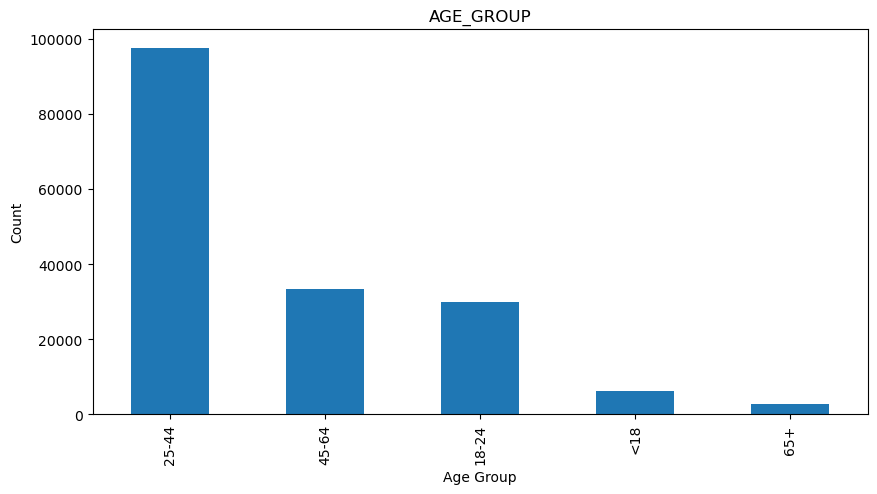

In [31]:
# visualize distribution of AGE_GROUP 
df['AGE_GROUP'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title('AGE_GROUP')
plt.xlabel('Age Group')
plt.ylabel('Count')
    


Text(0, 0.5, 'Count')

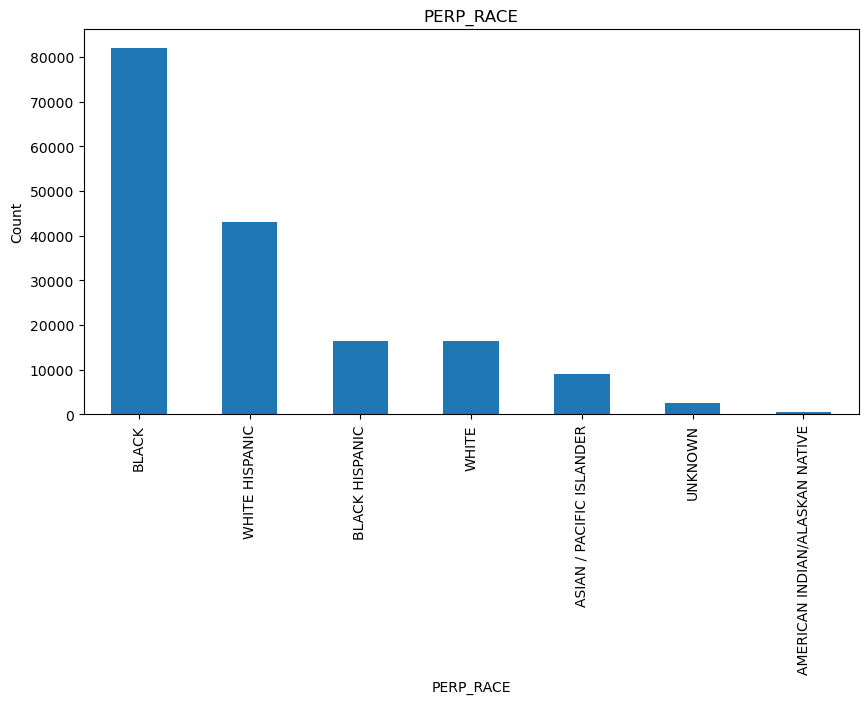

In [34]:
#visualize Perp_race value counts in descending order

df['PERP_RACE'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title('PERP_RACE')
plt.xlabel('PERP_RACE')
plt.ylabel('Count')
    

In [5]:
# group by ARREST_BORO and count the number of unique ARREST_KEY
df.groupby('ARREST_BORO')['ARREST_KEY'].nunique().sort_values(ascending=False)
    

ARREST_BORO
K    46825
B    39957
M    39652
Q    36246
S     7415
Name: ARREST_KEY, dtype: int64

In [6]:
# group by ARREST_BORO and age_group and count the number of unique ARREST_KEY
df.groupby(['ARREST_BORO','AGE_GROUP'])['ARREST_KEY'].nunique().sort_values(ascending=False)

ARREST_BORO  AGE_GROUP
K            25-44        27037
B            25-44        22834
M            25-44        22404
Q            25-44        21241
K            45-64         9080
M            45-64         9027
K            18-24         8278
B            18-24         7716
             45-64         7209
Q            45-64         6575
             18-24         6464
M            18-24         6267
S            25-44         4085
K            <18           1752
B            <18           1681
S            45-64         1525
             18-24         1311
Q            <18           1253
M            <18           1185
             65+            769
Q            65+            713
K            65+            678
B            65+            517
S            <18            374
             65+            120
Name: ARREST_KEY, dtype: int64